In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json 

In [3]:
import subprocess
from pprint import pprint

In [39]:
cmd = [f'mkdir -p bin; mkdir -p config; mkdir -p data; mkdir -p graphs']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
print(cout.decode(), cerr.decode())

In [40]:
cmd = [f'g++ -o ./bin/oscill double_oscill.cpp']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
print(cout.decode(), cerr.decode())

In [41]:
#setup config
cpp_config_path = "config/config.json"
config_data = {}

config_data['phi'] = 1
config_data['psi'] = 1
config_data['vel_phi'] = 0
config_data['vel_psi'] = 0

config_data['time_div'] = 0.1
config_data['time_begin'] = 0
config_data['time_end'] = 2000

config_data['m1'] = 1
config_data['m2'] = 1
config_data['l1'] = 100
config_data['l2'] = 50
config_data['g'] = -10

config_data['outfile'] = "data/data.csv"
config_data['method'] = "rk4"
config_data['type'] = "phys"
config_data['dump'] = 1

In [42]:
with open(cpp_config_path, 'w') as outfile:
    json.dump(config_data, outfile)
cmd = [f'./bin/oscill {cpp_config_path}']
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
cout, cerr = p.communicate()
print(cout, cerr)


b'' b''


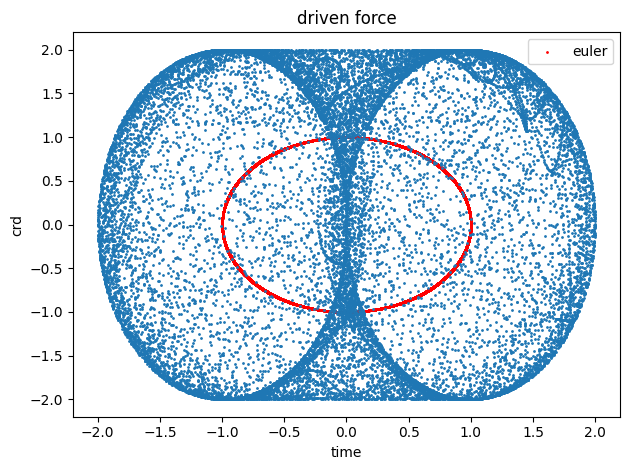

In [43]:
df = pd.read_csv(config_data['outfile'])

fig, ax = plt.subplots()

ax.scatter(np.sin(df['psi']), -np.cos(df['psi']), color = 'r', label = 'euler', s = 1)
ax.scatter(np.sin(df['phi']) + np.sin(df['psi']), -np.cos(df['psi'])- np.cos(df['psi']), s = 1)

ax.set_xlabel('time')
ax.set_ylabel('crd')
ax.set_title(f'driven force')
fig.tight_layout()
ax.legend()
fig.savefig(f'graphs/driven_force.png')

In [26]:
import pygame
 
pygame.init()
 
white = (255, 255, 255)
black = (0, 0, 0)
red = (255, 0, 0)
blue = (0, 0, 255)
 
dis = pygame.display.set_mode((600, 600))
 
game_over = False
clock = pygame.time.Clock()
pygame.display.set_caption('Oscillator')
 

df = pd.read_csv("data/data.csv")
for i in range(len(df)):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            game_over = True
    l1 = config_data['l1']
    l2 = config_data['l2']
    x1 = np.sin(df['phi'][i]) * l1
    y1 = -np.cos(df['phi'][i]) * l1
    x2 = np.sin(df['phi'][i]) * l1 + np.sin(df['psi'][i]) * l2
    y2 = -np.cos(df['phi'][i]) * l1- np.cos(df['psi'][i]) * l2
    x1 += 300
    x2 += 300
    y1 += 300
    y2 += 300

    dis.fill(white)
    pygame.draw.circle(dis, black, (x1, y1), 10)
    pygame.draw.circle(dis, black, (x2, y2), 10)
    pygame.draw.line(dis, red, (x1, y1), (x2, y2), 5)
    pygame.draw.line(dis, red, (300, 300), (x1, y1), 5)

    pygame.display.update()
    clock.tick(100)
    if game_over:
        break

pygame.quit()

In [27]:
import pygame
 
pygame.init()
 
white = (255, 255, 255)
black = (0, 0, 0)
red = (255, 0, 0)
blue = (0, 0, 255)
 
dis = pygame.display.set_mode((600, 600))
 
game_over = False
clock = pygame.time.Clock()
pygame.display.set_caption('Oscillator')
 

df1 = pd.read_csv("data/data1.csv")
df2 = pd.read_csv("data/data2.csv")
for i in range(len(df1)):
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            game_over = True
    l1 = config_data['l1']
    l2 = config_data['l2']
    x1 = np.sin(df1['phi'][i]) * l1
    y1 = -np.cos(df1['phi'][i]) * l1
    x2 = np.sin(df1['phi'][i]) * l1 + np.sin(df1['psi'][i]) * l2
    y2 = -np.cos(df1['phi'][i]) * l1- np.cos(df1['psi'][i]) * l2
    x1 += 300
    x2 += 300
    y1 += 300
    y2 += 300
    
    x12 = np.sin(df2['phi'][i]) * l1
    y12 = -np.cos(df2['phi'][i]) * l1
    x22 = np.sin(df2['phi'][i]) * l1 + np.sin(df2['psi'][i]) * l2
    y22 = -np.cos(df2['phi'][i]) * l1- np.cos(df2['psi'][i]) * l2
    x12 += 300
    x22 += 300
    y12 += 300
    y22 += 300
    dis.fill(white)
    pygame.draw.circle(dis, black, (x1, y1), 10)
    pygame.draw.circle(dis, black, (x2, y2), 10)
    pygame.draw.line(dis, red, (x1, y1), (x2, y2), 5)
    pygame.draw.line(dis, red, (300, 300), (x1, y1), 5)

    pygame.draw.circle(dis, black, (x12, y12), 10)
    pygame.draw.circle(dis, black, (x22, y22), 10)
    pygame.draw.line(dis, blue, (x12, y12), (x22, y22), 5)
    pygame.draw.line(dis, blue, (300, 300), (x12, y12), 5)

    pygame.display.update()
    clock.tick(100)
    if game_over:
        break

pygame.quit()